In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [8]:
df = pd.read_csv('datos_gambling.csv') #Features que se usaran para el clustering

In [9]:
df.columns

Index(['Unnamed: 0', 'player_win', 'player_loss', 'push', 'total_hands',
       'win_pct', 'win_push', 'win_push_pct', 'doubles_won', 'doubles_lost',
       'doubles_won_pct', 'player_bj', 'dealer_bj', 'dealer_high_card',
       'dealer_low_card', 'dealer_bust', 'dealer_draw', 'dealer_stand',
       'dealer_bust_pct', 'dealer_draw_pct', 'dealer_stand_pct',
       'dealer_avg_hand', 'num_of_shuffles', 'shuffle_method'],
      dtype='object')

In [10]:
df.head()

,Unnamed: 0,player_win,player_loss,push,total_hands,win_pct,win_push,win_push_pct,doubles_won,doubles_lost,...,dealer_low_card,dealer_bust,dealer_draw,dealer_stand,dealer_bust_pct,dealer_draw_pct,dealer_stand_pct,dealer_avg_hand,num_of_shuffles,shuffle_method
0,0,20,23,3,46,0.435,23,0.500,1,1,...,15,12,16,18,0.261,0.348,0.391,17.852,1,riffle_clumpy
1,0,14,31,1,46,0.304,15,0.326,2,7,...,23,7,21,18,0.152,0.457,0.391,18.258,2,riffle_clumpy
2,0,23,22,3,48,0.479,26,0.542,4,2,...,19,14,18,16,0.292,0.375,0.333,18.267,3,riffle_clumpy
3,0,21,23,4,48,0.438,25,0.521,3,1,...,23,13,14,21,0.271,0.292,0.438,18.168,4,riffle_clumpy
4,0,18,28,3,49,0.367,21,0.429,3,1,...,19,9,19,21,0.184,0.388,0.429,18.199,5,riffle_clumpy


In [11]:
#df = df.drop(["Unnamed: 0", "win_pct", "win_push_pct", "doubles_won_pct", "dealer_high_card", "dealer_low_card", "dealer_bust_pct", "shuffle_method", "dealer_draw_pct", "dealer_stand_pct"], axis=1)
df = df.drop(["Unnamed: 0", "shuffle_method", "num_of_shuffles", "dealer_stand", "dealer_low_card", "dealer_high_card", "dealer_draw", "player_bj", "dealer_bj", "total_hands"], axis=1)

In [12]:
df

,player_win,player_loss,push,win_pct,win_push,win_push_pct,doubles_won,doubles_lost,doubles_won_pct,dealer_bust,dealer_bust_pct,dealer_draw_pct,dealer_stand_pct,dealer_avg_hand
0,20,23,3,0.435,23,0.500,1,1,0.500,12,0.261,0.348,0.391,17.852
1,14,31,1,0.304,15,0.326,2,7,0.222,7,0.152,0.457,0.391,18.258
2,23,22,3,0.479,26,0.542,4,2,0.667,14,0.292,0.375,0.333,18.267
3,21,23,4,0.438,25,0.521,3,1,0.750,13,0.271,0.292,0.438,18.168
4,18,28,3,0.367,21,0.429,3,1,0.750,9,0.184,0.388,0.429,18.199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,20,24,3,0.426,23,0.489,2,1,0.667,15,0.319,0.277,0.404,18.096
2876,26,20,2,0.542,28,0.583,3,2,0.600,12,0.250,0.271,0.479,18.078
2877,21,22,3,0.457,24,0.522,3,4,0.429,14,0.304,0.391,0.304,18.076
2878,25,19,3,0.532,28,0.596,4,1,0.800,14,0.298,0.298,0.404,18.071


In [13]:
#Diferenciamos los feature a usar
#numeric_features = ['edad', 'frecuencia_juego', 'duracion_sesiones', 'monto_apostado', 'cambios_monto_apostado', 'ganancias_perdidas', 'historial_juego']
#categorical_features = ['genero', 'nivel_educativo', 'ingresos', 'estado_civil', 'decisiones_juego', 'contexto_social', 'motivaciones_jugar']

numeric_features = df.columns

In [14]:
numeric_features

Index(['player_win', 'player_loss', 'push', 'win_pct', 'win_push',
       'win_push_pct', 'doubles_won', 'doubles_lost', 'doubles_won_pct',
       'dealer_bust', 'dealer_bust_pct', 'dealer_draw_pct', 'dealer_stand_pct',
       'dealer_avg_hand'],
      dtype='object')

In [15]:
#Definimos la transformacion de los feature
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
        #('cat', OneHotEncoder(), categorical_features)
    ])

In [16]:
#Aplicamos la transformacion
X = preprocessor.fit_transform(df)

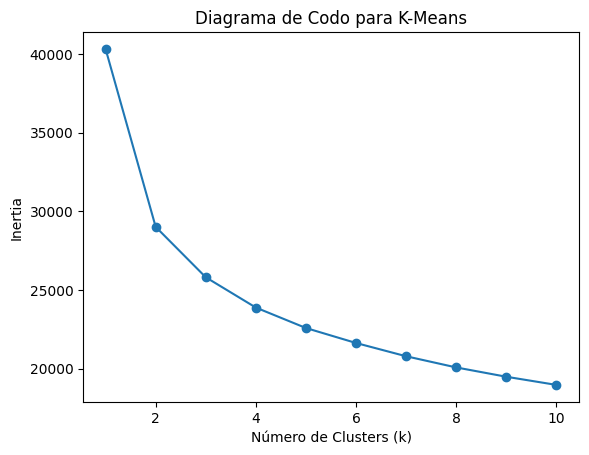

In [17]:
#Diagrama de codo
k_values = range(1, 11)
# Inercia / distancia promedio a los clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inertia')
plt.title('Diagrama de Codo para K-Means')
plt.show()

In [18]:
#Aplicamos Kmeans diviendolo en 2 clusters (grupos)
kmeans = KMeans(n_clusters=2, random_state=42)  #Ajustar el número de clusters
clusters = kmeans.fit_predict(X)

In [19]:
#Se a;ade la columna cluster con su valor respectivo (Adicto / No adicto)
df['cluster'] = clusters

In [20]:
df

,player_win,player_loss,push,win_pct,win_push,win_push_pct,doubles_won,doubles_lost,doubles_won_pct,dealer_bust,dealer_bust_pct,dealer_draw_pct,dealer_stand_pct,dealer_avg_hand,cluster
0,20,23,3,0.435,23,0.500,1,1,0.500,12,0.261,0.348,0.391,17.852,1
1,14,31,1,0.304,15,0.326,2,7,0.222,7,0.152,0.457,0.391,18.258,1
2,23,22,3,0.479,26,0.542,4,2,0.667,14,0.292,0.375,0.333,18.267,0
3,21,23,4,0.438,25,0.521,3,1,0.750,13,0.271,0.292,0.438,18.168,0
4,18,28,3,0.367,21,0.429,3,1,0.750,9,0.184,0.388,0.429,18.199,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,20,24,3,0.426,23,0.489,2,1,0.667,15,0.319,0.277,0.404,18.096,0
2876,26,20,2,0.542,28,0.583,3,2,0.600,12,0.250,0.271,0.479,18.078,0
2877,21,22,3,0.457,24,0.522,3,4,0.429,14,0.304,0.391,0.304,18.076,0
2878,25,19,3,0.532,28,0.596,4,1,0.800,14,0.298,0.298,0.404,18.071,0


In [21]:
#Se crea y entrena el arbol de decision para analizar la importancia de las feature y su relacion al cluster
clf = DecisionTreeClassifier()
clf.fit(X, clusters)

DecisionTreeClassifier()

In [22]:
#Se extraen la importancia de estas
importances = clf.feature_importances_
feature_importances = pd.DataFrame(importances, index=numeric_features, columns=['importance']).sort_values('importance', ascending=False)

In [23]:
#Importancia de las feature en el problema
print(feature_importances)

                  importance
win_pct             0.625254
win_push_pct        0.132341
dealer_bust         0.092413
dealer_bust_pct     0.056674
doubles_won_pct     0.041231
doubles_won         0.016669
dealer_avg_hand     0.009667
win_push            0.008822
dealer_draw_pct     0.004842
player_win          0.003602
player_loss         0.002616
doubles_lost        0.002551
dealer_stand_pct    0.002056
push                0.001261


In [24]:
# Analizar los clusters
cluster_summary = df.groupby('cluster').mean()
print(cluster_summary)

         player_win  player_loss      push   win_pct   win_push  win_push_pct  \
cluster                                                                         
0         22.960860    20.590177  3.221028  0.491240  26.181888      0.560005   
1         18.036145    25.847812  3.396322  0.381672  21.432467      0.453471   

         doubles_won  doubles_lost  doubles_won_pct  dealer_bust  \
cluster                                                            
0           3.635457      1.831926         0.667127    14.481965   
1           2.568802      2.473050         0.506773    10.509195   

         dealer_bust_pct  dealer_draw_pct  dealer_stand_pct  dealer_avg_hand  
cluster                                                                       
0               0.310055         0.319295          0.370671        18.042751  
1               0.222622         0.363262          0.414133        18.057058  


In [25]:
#Expoertacion del modelo
joblib.dump(clusters, 'modelo_clustering.pkl')

['modelo_clustering.pkl']

In [26]:
silhouette_avg = silhouette_score(df, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.33167837981660053
